# Prueba Técnica - Wise Athena
### Technical Test - Wise Athena

## 1. Access

In case of running in local

In [1]:
import os
import sys

In [2]:
# Taking the path of this .ipynb
os.getcwd()

'c:\\Users\\maria\\OneDrive\\Escritorio\\The_Bridge\\Visual_Studio_Code\\Python\\Prueba_t-cnica_WA\\src'

In [3]:
# Jumping to the previous folder
rooth_path = os.path.dirname(os.getcwd())
rooth_path

'c:\\Users\\maria\\OneDrive\\Escritorio\\The_Bridge\\Visual_Studio_Code\\Python\\Prueba_t-cnica_WA'

In [4]:
# Adding the previous folder to the sys.path so that anyone can run this script
sys.path.append(rooth_path)
sys.path = list(set(sys.path)) # To avoid duplicates in each run
sys.path

['',
 'c:\\Users\\maria\\.vscode\\extensions\\ms-toolsai.jupyter-2021.5.745244803\\pythonFiles\\lib\\python',
 'C:\\Program Files\\Python38',
 'C:\\Program Files\\Python38\\DLLs',
 'C:\\Users\\maria\\.ipython',
 'C:\\Program Files\\Python38\\lib\\site-packages\\win32',
 'c:\\Users\\maria\\.vscode\\extensions\\ms-toolsai.jupyter-2021.5.745244803\\pythonFiles',
 'c:\\Users\\maria\\OneDrive\\Escritorio\\The_Bridge\\Visual_Studio_Code\\Python\\Prueba_t-cnica_WA\\src',
 'C:\\Program Files\\Python38\\lib\\site-packages',
 'c:\\Users\\maria\\OneDrive\\Escritorio\\The_Bridge\\Visual_Studio_Code\\Python\\Prueba_t-cnica_WA',
 'C:\\Program Files\\Python38\\lib\\site-packages\\IPython\\extensions',
 'C:\\Program Files\\Python38\\python38.zip',
 'C:\\Program Files\\Python38\\lib\\site-packages\\win32\\lib',
 'C:\\Program Files\\Python38\\lib',
 'C:\\Program Files\\Python38\\lib\\site-packages\\Pythonwin']

## 2. Librerías

In [5]:
import pandas as pd
from pandas_profiling import ProfileReport
pd.options.mode.chained_assignment = None  # To avoid default='warn'

from src.utils.mining_data_tb import changing_dates, split_column, check_dupli_nan
from src.utils.visualization_tb import histogram_figure, linediagram_figure, correlation_matrix, piechart_figure_6labels

## 3. Read csv

In [6]:
sellin = pd.read_csv("../data/sellin.csv", sep=",", low_memory=False)
sellout_prov1 = pd.read_csv("../data/sellout-proveedor1.csv", sep=",", low_memory=False)
sellout_prov2 = pd.read_csv("../data/sellout-proveedor2.csv", sep=",", low_memory=False)
maestro_prod = pd.read_csv("../data/maestro_productos_prueba.csv", sep=",")
maestro_client = pd.read_excel("../data/maestro_clientes_prueba.xlsx",  engine='openpyxl')

## 4. Understanding Data

In [7]:
print(sellin.shape)
print(sellout_prov1.shape)
print(sellout_prov2.shape)
print(maestro_prod.shape)
print(maestro_client.shape)

(4188783, 6)
(1206365, 5)
(4862029, 5)
(1242, 4)
(2452, 10)


In [8]:
# Sellin: purchase from our client to supliers EX: Danone to Carrefour
sellin.head()

Sku        Date  Store_Id  Pieces  Price  Margin
0  4220015  02/01/2015       100    20.0  13.01    9.78
1  4220015  02/01/2015       116    20.0  13.01    9.78
2  4220015  02/01/2015       141    80.0  13.01    9.78
3  4220015  02/01/2015       146    10.0  13.01    9.78
4  4220015  02/01/2015       151    20.0  13.09    9.87

In [9]:
# Sellout_prov1: purchase from the first suplier to final client EX: Carrefour to final user
sellout_prov1.head()

Sku                         Date  Store_Id  Units  Price
0  4220015  2017-01-01 SO Diaria Piezas        18    6.0   15.6
1  4220015  2017-01-01 SO Diaria Piezas        24    0.0    0.0
2  4220015  2017-01-01 SO Diaria Piezas        39    0.0    0.0
3  4220015  2017-01-01 SO Diaria Piezas        44    0.0    0.0
4  4220015  2017-01-01 SO Diaria Piezas        46    0.0    0.0

In [10]:
# Sellout_prov2: purchase from the second suplier to final client EX: Mercadona to final user
sellout_prov2.head()

Sku        Date  Store_Id  Pieces   Price
0  4240039  2016/01/01      1000    23.0  $16.00
1  4240039  2016/01/01      1001   116.0  $16.00
2  4240039  2016/01/01      1002   146.0  $16.00
3  4240039  2016/01/01      1003    17.0  $16.80
4  4240039  2016/01/01      1004     5.0  $16.70

In [11]:
# Type of produts of our client and competitors
maestro_prod.head()

Sku      Sku_Description   Sku_Category Sku_Subcategory
0  11058       Frosted Mango      Sugar-free     Cereal bars
1  29207  Nut Cheerios Mango   Super-flavour      Cereal box
2  38379    MultiGrain Mango      Sugar-free     Cereal bars
3  42671        Crunch Mango      Sugar-free     Cereal bars
4  54644          Corn Mango      Sugar-free     Cereal bars

In [12]:
# Shops and refer suppliers which sell their products
maestro_client.head()

NUM TDA              NOMBRE DE TDA       CADENA FORMATO  \
0        2  Bloody Sea Green BookShop  proveedor_1    Shop   
1        4  Funny Sky Blue GipsyTrade  proveedor_1    Shop   
2        5      Rare Green Laundrette  proveedor_1    Shop   
3        6        Angry Indigo Center  proveedor_1    Shop   
4        7           Tall Violet Deli  proveedor_1    Shop   

       MUNICIPIO/CIUDAD   ESTADO DIVISION DEPOSITO / DISTRIBUIDOR  \
0    Bizarre White Shop  Coalmar  SURESTE          Mogulval Corp.   
1    Bizarre White Shop  Coalmar  SURESTE          Mogulval Corp.   
2  Rare Orange Applepie  Coalmar  SURESTE        Eioval Aerospace   
3  Rare Orange Applepie  Coalmar  SURESTE        Eioval Aerospace   
4  Rare Orange Applepie  Coalmar  SURESTE        Eioval Aerospace   

       ESTRUCTURA GRADO  
0  DISTRIBUIDORES    VI  
1  DISTRIBUIDORES    VI  
2         FORANEO    VI  
3         FORANEO    VI  
4         FORANEO    VI

In [13]:
# Here we confirm we have only 2 different suppliers
maestro_client.CADENA.unique()

array(['proveedor_1', 'proveedor_2'], dtype=object)

In [14]:
# Here we saw that the column Margin doen't vary depending on the column pieces.
sellin[(sellin["Pieces"] == 0) | (sellin["Pieces"] == 5)]

Sku        Date  Store_Id  Pieces  Price  Margin
22       4220015  02/01/2015      1150     5.0  12.59    9.36
23       4220015  02/01/2015      1160     5.0  12.59    9.36
24       4220015  02/01/2015      1161     0.0  12.59    9.36
32       4220015  02/01/2015      1497     5.0  12.72    9.49
74       4220015  02/01/2015      3765     5.0  12.59    9.36
...          ...         ...       ...     ...    ...     ...
4188052  4829827  17/05/2017      2093     0.0  20.51   14.62
4188207  4829827  19/05/2017      3776     0.0  20.51   14.62
4188281  4829827  20/05/2017      3834     0.0  20.51   14.62
4188404  4829827  23/05/2017      3857     0.0  20.51   14.62
4188601  4829827  29/05/2017      1124     0.0  20.51   14.62

[70882 rows x 6 columns]

## 5. Checking for NaN and duplicates

In [15]:
# Here I imported a function from src.utils.mining_data_tb to check if there is any duplicate or nan by each DataFrame
check_dupli_nan("sellin", sellin)
check_dupli_nan("sellout_prov1", sellout_prov1)
check_dupli_nan("sellout_prov2", sellout_prov2)
check_dupli_nan("maestro_prod", maestro_prod)
check_dupli_nan("maestro_client", maestro_client)

sellin duplicates ----> True
sellin null ----> False
-------------------------- 

sellout_prov1 duplicates ----> False
sellout_prov1 null ----> False
-------------------------- 

sellout_prov2 duplicates ----> True
sellout_prov2 null ----> False
-------------------------- 

maestro_prod duplicates ----> False
maestro_prod null ----> False
-------------------------- 

maestro_client duplicates ----> False
maestro_client null ----> False
-------------------------- 



In [16]:
# Here I droped the duplicates and I did again the checkup
sellin = sellin.drop_duplicates()
check_dupli_nan("sellin", sellin)

sellout_prov2 = sellout_prov2.drop_duplicates()
check_dupli_nan("sellout_prov2", sellout_prov2)

sellin duplicates ----> False
sellin null ----> False
-------------------------- 

sellout_prov2 duplicates ----> False
sellout_prov2 null ----> False
-------------------------- 



## 6. Sellin csv

In [17]:
# Remembering how the dataframe is
sellin.head()

Sku        Date  Store_Id  Pieces  Price  Margin
0  4220015  02/01/2015       100    20.0  13.01    9.78
1  4220015  02/01/2015       116    20.0  13.01    9.78
2  4220015  02/01/2015       141    80.0  13.01    9.78
3  4220015  02/01/2015       146    10.0  13.01    9.78
4  4220015  02/01/2015       151    20.0  13.09    9.87

In [18]:
# Checking what type of format are the columns
sellin.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4188765 entries, 0 to 4188782
Data columns (total 6 columns):
 #   Column    Dtype  
---  ------    -----  
 0   Sku       int64  
 1   Date      object 
 2   Store_Id  int64  
 3   Pieces    float64
 4   Price     float64
 5   Margin    float64
dtypes: float64(3), int64(2), object(1)
memory usage: 223.7+ MB


In [19]:
# Imported the function from src.utils.mining_data_tb to change the date from object to datetime format
changing_dates(df=sellin, name_column="Date")

In [20]:
# Checking the change of the Dtype of Date column was done well
sellin.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4188765 entries, 0 to 4188782
Data columns (total 6 columns):
 #   Column    Dtype         
---  ------    -----         
 0   Sku       int64         
 1   Date      datetime64[ns]
 2   Store_Id  int64         
 3   Pieces    float64       
 4   Price     float64       
 5   Margin    float64       
dtypes: datetime64[ns](1), float64(3), int64(2)
memory usage: 223.7 MB


In [21]:
# A fundamental part is select the product from X Date to Y Date, so it's important to sort the DataFrame by Date
    # Here we can see that have been sold products from 2015 to 2017
sellin = sellin.sort_values("Date")
sellin

Sku       Date  Store_Id  Pieces  Price  Margin
1239443  4361050 2015-01-04        18   15.12  12.99   10.67
3228928  4769520 2015-01-04      3372    4.80  35.54   27.38
3228927  4769520 2015-01-04      3344    7.20  35.54   27.38
3228926  4769520 2015-01-04      3323    7.20  35.54   27.38
3228925  4769520 2015-01-04      3318    4.80  35.54   27.38
...          ...        ...       ...     ...    ...     ...
774678   4250046 2017-12-05      1086   12.00  15.17   10.66
774679   4250046 2017-12-05      1108  108.00  15.17   10.66
774680   4250046 2017-12-05      1110   48.00  15.17   10.66
774682   4250046 2017-12-05      1150   12.00  15.17   10.66
2103459  4523924 2017-12-05      1119    4.80  43.41   29.84

[4188765 rows x 6 columns]

In [22]:
# Here rename the column Pieces to Units as in the other csv
sellin = sellin.rename(columns={'Pieces': 'Units'})

In [23]:
# Deleting the units equal to 0 because they don't provide information
sellin = sellin.loc[(sellin["Units"] != 0)]
sellin

Sku       Date  Store_Id   Units  Price  Margin
1239443  4361050 2015-01-04        18   15.12  12.99   10.67
3228928  4769520 2015-01-04      3372    4.80  35.54   27.38
3228927  4769520 2015-01-04      3344    7.20  35.54   27.38
3228926  4769520 2015-01-04      3323    7.20  35.54   27.38
3228925  4769520 2015-01-04      3318    4.80  35.54   27.38
...          ...        ...       ...     ...    ...     ...
774678   4250046 2017-12-05      1086   12.00  15.17   10.66
774679   4250046 2017-12-05      1108  108.00  15.17   10.66
774680   4250046 2017-12-05      1110   48.00  15.17   10.66
774682   4250046 2017-12-05      1150   12.00  15.17   10.66
2103459  4523924 2017-12-05      1119    4.80  43.41   29.84

[4141818 rows x 6 columns]

### 6.1 Checking outliers

In [24]:
# Here we see too much difference between high and low numbers of units
sellin.sort_values(by="Units", ascending=False)

Sku       Date  Store_Id    Units  Price  Margin
422013   4240039 2015-12-17       161  36000.0  14.51   10.78
1747186  4442378 2015-08-06      3356  26496.0  11.31    6.76
500925   4240039 2016-09-23       231  23400.0  14.51   10.23
446125   4240039 2016-03-16       129  19236.0  14.51   10.22
438751   4240039 2016-02-18       242  19200.0  14.51   10.22
...          ...        ...       ...      ...    ...     ...
2948353  4655669 2017-01-28      3929      0.2  41.38   30.84
3213774  4769520 2015-04-02      5498      0.2  35.54   27.38
2039458  4523924 2016-09-05      2118      0.2  35.54   22.86
2007274  4523924 2015-10-26      1475      0.2  35.54   24.56
3278034  4769520 2015-01-10      1082      0.2  36.23   28.07

[4141818 rows x 6 columns]

In [25]:
# There we could see that most are less than 1.000 and only 62 greater than 10.000. 
    # This could be an error but there are too many cases to consider it error so I prefer to stay this as it is.
print("less than 1000:", sellin.loc[(sellin["Units"] <= 1000)].shape[0])
print("greater than 5000:", sellin.loc[(sellin["Units"] >= 5000)].shape[0])
print("greater than 10000:", sellin.loc[(sellin["Units"] >= 10000)].shape[0])

less than 1000: 4063723
greater than 5000: 772
greater than 10000: 62


In [26]:
# Everythin ok
sellin.sort_values(by="Price", ascending=False)

Sku       Date  Store_Id  Units  Price  Margin
3201528  4739414 2017-04-25      1039    2.4  47.80   38.22
3201573  4739414 2017-04-26      3767    4.8  47.80   38.22
3201575  4739414 2017-04-26      3774    4.8  47.80   38.22
3201577  4739414 2017-04-26      3811    4.8  47.80   38.22
3201578  4739414 2017-04-26      3845    4.8  47.80   38.22
...          ...        ...       ...    ...    ...     ...
1866129  4442378 2016-07-20      1548  120.0  10.97    5.40
1866128  4442378 2016-07-20      1547  144.0  10.97    5.40
1866127  4442378 2016-07-20      1533  108.0  10.97    5.40
1866126  4442378 2016-07-20      1505   24.0  10.97    5.40
1872991  4442378 2016-11-08      2207   12.0  10.97    5.40

[4141818 rows x 6 columns]

In [27]:
sellin.sort_values(by="Margin", ascending=False)

Sku       Date  Store_Id  Units  Price  Margin
3204515  4749421 2017-04-22       644   10.8  46.96   39.15
3204138  4749421 2017-04-14       125    5.4  46.96   39.15
3205530  4749421 2017-05-26       626    5.4  46.96   39.15
3205531  4749421 2017-05-26       663    5.4  46.96   39.15
3203789  4749421 2017-04-04       617   10.8  46.96   39.15
...          ...        ...       ...    ...    ...     ...
1863378  4442378 2016-11-07      3317   24.0  10.97    5.40
1863379  4442378 2016-11-07      3318   36.0  10.97    5.40
1863380  4442378 2016-11-07      3331   12.0  10.97    5.40
1863381  4442378 2016-11-07      3345   36.0  10.97    5.40
1863616  4442378 2016-12-07      1800   12.0  10.97    5.40

[4141818 rows x 6 columns]

## 7. Sellout_prov1

In [28]:
# Remembering how the dataframe is
sellout_prov1.head()

Sku                         Date  Store_Id  Units  Price
0  4220015  2017-01-01 SO Diaria Piezas        18    6.0   15.6
1  4220015  2017-01-01 SO Diaria Piezas        24    0.0    0.0
2  4220015  2017-01-01 SO Diaria Piezas        39    0.0    0.0
3  4220015  2017-01-01 SO Diaria Piezas        44    0.0    0.0
4  4220015  2017-01-01 SO Diaria Piezas        46    0.0    0.0

In [29]:
# Checking if SO Diaria Piezas is in all the cells of Date column
sellout_prov1.Date.unique()

array(['2017-01-01 SO Diaria Piezas', '2017-01-02 SO Diaria Piezas',
       '2017-01-03 SO Diaria Piezas', '2017-01-04 SO Diaria Piezas',
       '2017-01-05 SO Diaria Piezas', '2017-01-06 SO Diaria Piezas',
       '2017-01-07 SO Diaria Piezas', '2017-01-08 SO Diaria Piezas',
       '2017-01-09 SO Diaria Piezas', '2017-01-10 SO Diaria Piezas',
       '2017-01-11 SO Diaria Piezas', '2017-01-12 SO Diaria Piezas',
       '2017-01-13 SO Diaria Piezas', '2017-01-14 SO Diaria Piezas',
       '2017-01-15 SO Diaria Piezas', '2017-01-16 SO Diaria Piezas',
       '2017-01-17 SO Diaria Piezas', '2017-01-18 SO Diaria Piezas',
       '2017-01-19 SO Diaria Piezas', '2017-01-20 SO Diaria Piezas',
       '2017-01-21 SO Diaria Piezas', '2017-01-22 SO Diaria Piezas',
       '2017-01-23 SO Diaria Piezas', '2017-01-24 SO Diaria Piezas',
       '2017-01-25 SO Diaria Piezas', '2017-01-26 SO Diaria Piezas',
       '2017-01-27 SO Diaria Piezas', '2017-01-28 SO Diaria Piezas',
       '2017-01-29 SO Diaria Pieza

In [30]:
# Imported a function from src.utils.mining_data_tb to split the column and delete SO Diaria Pieza
split_column(df=sellout_prov1, column="Date", separation_object=" ", times=1)

In [31]:
# Checking if the split was done well
sellout_prov1.Date.unique()

array(['2017-01-01', '2017-01-02', '2017-01-03', '2017-01-04',
       '2017-01-05', '2017-01-06', '2017-01-07', '2017-01-08',
       '2017-01-09', '2017-01-10', '2017-01-11', '2017-01-12',
       '2017-01-13', '2017-01-14', '2017-01-15', '2017-01-16',
       '2017-01-17', '2017-01-18', '2017-01-19', '2017-01-20',
       '2017-01-21', '2017-01-22', '2017-01-23', '2017-01-24',
       '2017-01-25', '2017-01-26', '2017-01-27', '2017-01-28',
       '2017-01-29', '2017-01-30', '2017-01-31', '2017-02-01',
       '2017-02-02', '2017-02-03', '2017-02-04', '2017-02-05',
       '2017-02-06', '2017-02-07', '2017-02-08', '2017-02-09',
       '2017-02-10', '2017-02-11', '2017-02-12', '2017-02-13',
       '2017-02-14', '2017-02-15', '2017-02-16', '2017-02-17',
       '2017-02-18', '2017-02-19', '2017-02-20', '2017-02-21',
       '2017-02-22', '2017-02-23', '2017-02-24', '2017-02-25',
       '2017-02-26', '2017-02-27', '2017-02-28', '2017-03-01',
       '2017-03-02', '2017-03-03', '2017-03-04', '2017-

In [32]:
# Imported the function from src.utils.mining_data_tb to change the date from object to datetime format
changing_dates(df=sellout_prov1, name_column="Date")

# Checking the change of the Dtype of Date column was done well
sellout_prov1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1206365 entries, 0 to 1206364
Data columns (total 5 columns):
 #   Column    Non-Null Count    Dtype         
---  ------    --------------    -----         
 0   Sku       1206365 non-null  int64         
 1   Date      1206365 non-null  datetime64[ns]
 2   Store_Id  1206365 non-null  int64         
 3   Units     1206365 non-null  float64       
 4   Price     1206365 non-null  float64       
dtypes: datetime64[ns](1), float64(2), int64(2)
memory usage: 46.0 MB


In [33]:
# A fundamental part is select the product from X Date to Y Date, so it's important to sort the DataFrame by Date
    # Here we can see that have been sold product only in 2017
sellout_prov1 = sellout_prov1.sort_values("Date")
sellout_prov1

Sku       Date  Store_Id  Units      Price
0        4220015 2017-01-01        18   6.00  15.600000
293184   4422187 2017-01-01       102   0.50  22.000000
293185   4422187 2017-01-01       105   1.00  22.000000
293186   4422187 2017-01-01       106   1.50  22.000000
293187   4422187 2017-01-01       107   0.00   0.000000
...          ...        ...       ...    ...        ...
485316   4533931 2017-06-04       112   1.35  56.666667
485315   4533931 2017-06-04       111   4.50  56.666667
485314   4533931 2017-06-04       110   0.00   0.000000
485324   4533931 2017-06-04       121   6.30  56.666667
1206364  4829827 2017-06-04       709   0.00   0.000000

[1206365 rows x 5 columns]

In [34]:
# Deleting the units equal to 0 because they don't provide information
sellout_prov1 = sellout_prov1.loc[(sellout_prov1["Units"] != 0)]
sellout_prov1

Sku       Date  Store_Id  Units      Price
0       4220015 2017-01-01        18   6.00  15.600000
293184  4422187 2017-01-01       102   0.50  22.000000
293185  4422187 2017-01-01       105   1.00  22.000000
293186  4422187 2017-01-01       106   1.50  22.000000
293192  4422187 2017-01-01       113   0.25  22.000000
...         ...        ...       ...    ...        ...
485319  4533931 2017-06-04       116   6.30  56.666667
485318  4533931 2017-06-04       114   0.90  56.666667
485316  4533931 2017-06-04       112   1.35  56.666667
485315  4533931 2017-06-04       111   4.50  56.666667
485324  4533931 2017-06-04       121   6.30  56.666667

[638363 rows x 5 columns]

### 7.1 Checking outliers

In [35]:
# Here we see units in negative.
sellout_prov1.sort_values(by="Units", ascending=False)

Sku       Date  Store_Id     Units      Price
39198    4240039 2017-02-21       231  19354.00  15.960000
39392    4240039 2017-02-22       129   9747.00  16.000000
41967    4240039 2017-03-05       130   9451.00  14.060000
41030    4240039 2017-03-01       129   8842.00  15.600000
42435    4240039 2017-03-07       130   8397.00  13.980000
...          ...        ...       ...       ...        ...
638967   4615034 2017-04-20       235    -66.00  17.050000
70245    4250046 2017-01-30         9   -310.00  15.920000
1036947  4779537 2017-02-11       702   -310.05  42.955556
620350   4615034 2017-01-30         9   -485.00  16.280000
1037187  4779537 2017-02-12       702   -675.45  40.888889

[638363 rows x 5 columns]

We have two options
- Put the units to cero
- Put the numbers in positive.

In this case, I choose the second option because I think the error is more likely to be a positive number.

In [36]:
# Changing units negative to absolute value
sellout_prov1['Units'] = sellout_prov1['Units'].abs()

# Checking that the change has been done well
sellout_prov1.sort_values(by="Units", ascending=False)

Sku       Date  Store_Id    Units  Price
39198   4240039 2017-02-21       231  19354.0  15.96
39392   4240039 2017-02-22       129   9747.0  16.00
41967   4240039 2017-03-05       130   9451.0  14.06
41030   4240039 2017-03-01       129   8842.0  15.60
42435   4240039 2017-03-07       130   8397.0  13.98
...         ...        ...       ...      ...    ...
970288  4739414 2017-03-15         8      0.2  64.00
970296  4739414 2017-03-15        20      0.2  64.00
421169  4523924 2017-01-26       635      0.2  54.00
432187  4523924 2017-03-15       705      0.2  53.75
426871  4523924 2017-02-20       608      0.2  41.75

[638363 rows x 5 columns]

In [37]:
# Here we see units in negative.
sellout_prov1.sort_values(by="Price", ascending=False)

Sku       Date  Store_Id  Units       Price
1036804  4779537 2017-02-11       116   0.45  871.933333
1033149  4779537 2017-01-27        39   0.45  835.177778
1029464  4779537 2017-01-11       619   1.80  649.866667
460058   4533931 2017-02-11       232   0.45  644.422222
996751   4769520 2017-01-29       130   0.20  584.250000
...          ...        ...       ...    ...         ...
629173   4615034 2017-03-09        60   1.00  -25.200000
1127829  4809797 2017-04-29       102   0.25  -29.880000
1166200  4819810 2017-05-12        61   0.25  -71.560000
643556   4615034 2017-05-10       144   3.00 -106.000000
1019837  4769520 2017-05-06       130   6.00 -190.050000

[638363 rows x 5 columns]

In [38]:
# Changing units negative to absolute value
sellout_prov1['Price'] = sellout_prov1['Price'].abs()

# Checking that the change has been done well
sellout_prov1.sort_values(by="Price", ascending=False)

Sku       Date  Store_Id  Units       Price
1036804  4779537 2017-02-11       116   0.45  871.933333
1033149  4779537 2017-01-27        39   0.45  835.177778
1029464  4779537 2017-01-11       619   1.80  649.866667
460058   4533931 2017-02-11       232   0.45  644.422222
996751   4769520 2017-01-29       130   0.20  584.250000
...          ...        ...       ...    ...         ...
61481    4240039 2017-05-27       630   4.00    0.000000
515216   4554143 2017-01-05       172   3.00    0.000000
60342    4240039 2017-05-22       681  11.00    0.000000
180805   4351043 2017-05-17       681  13.23    0.000000
1130735  4809797 2017-05-12        39   0.25    0.000000

[638363 rows x 5 columns]

## Sellout_prov2

In [39]:
# Remembering how the dataframe is
sellout_prov2.head()

Sku        Date  Store_Id  Pieces   Price
0  4240039  2016/01/01      1000    23.0  $16.00
1  4240039  2016/01/01      1001   116.0  $16.00
2  4240039  2016/01/01      1002   146.0  $16.00
3  4240039  2016/01/01      1003    17.0  $16.80
4  4240039  2016/01/01      1004     5.0  $16.70

In [40]:
# Imported the function from src.utils.mining_data_tb to change the date from object to datetime format
changing_dates(df=sellout_prov2, name_column="Date")

# Checking if the format is the correct one
sellout_prov2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4862026 entries, 0 to 4862028
Data columns (total 5 columns):
 #   Column    Dtype         
---  ------    -----         
 0   Sku       int64         
 1   Date      datetime64[ns]
 2   Store_Id  int64         
 3   Pieces    float64       
 4   Price     object        
dtypes: datetime64[ns](1), float64(1), int64(2), object(1)
memory usage: 222.6+ MB


In [41]:
# The Price column has elements that make it difficult to analyze, so I remove those elements and pass it to float format.  
sellout_prov2['Price'] = sellout_prov2['Price'].str.replace('$', '').astype(float)

In [42]:
# Checking the change was done well
sellout_prov2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4862026 entries, 0 to 4862028
Data columns (total 5 columns):
 #   Column    Dtype         
---  ------    -----         
 0   Sku       int64         
 1   Date      datetime64[ns]
 2   Store_Id  int64         
 3   Pieces    float64       
 4   Price     float64       
dtypes: datetime64[ns](1), float64(2), int64(2)
memory usage: 222.6 MB


In [43]:
# Changing the name of the column Pieces to Units as the dataframe of the other supplier
sellout_prov2 = sellout_prov2.rename(columns={'Pieces': 'Units'})
sellout_prov2

Sku       Date  Store_Id  Units  Price
0        4240039 2016-01-01      1000   23.0  16.00
1        4240039 2016-01-01      1001  116.0  16.00
2        4240039 2016-01-01      1002  146.0  16.00
3        4240039 2016-01-01      1003   17.0  16.80
4        4240039 2016-01-01      1004    5.0  16.70
...          ...        ...       ...    ...    ...
4862024  4729193 2016-12-30      5827   14.0  17.90
4862025  4729193 2016-12-30      5850    3.0  17.90
4862026  4729193 2016-12-30      5851    3.0  16.00
4862027  4729193 2016-12-30      5855   21.0  16.86
4862028  4729193 2016-08-20      3766   12.0  13.60

[4862026 rows x 5 columns]

In [44]:
# A fundamental part is select the product from X Date to Y Date, so it's important to sort the DataFrame by Date
    # Here we can see that have been sold product only in 2016
sellout_prov2 = sellout_prov2.sort_values("Date")
sellout_prov2

Sku       Date  Store_Id  Units  Price
0        4240039 2016-01-01      1000  23.00   16.0
4013864  4625287 2016-01-01      3399  33.25    7.5
4013865  4625287 2016-01-01      3400   2.50    7.5
4013866  4625287 2016-01-01      3401   3.00    7.5
4013867  4625287 2016-01-01      3402   1.00    7.5
...          ...        ...       ...    ...    ...
4063782  4625287 2016-12-30      3765   4.50    9.8
4063781  4625287 2016-12-30      3764   0.25    9.8
4063780  4625287 2016-12-30      3763   0.25    9.8
4063788  4625287 2016-12-30      3772  12.00    9.8
3307007  4543948 2016-12-30      5825  10.80   40.0

[4862026 rows x 5 columns]

In [45]:
# Deleting the units equal to 0 because they don't provide information
    # For the second supplier there weren't any 
sellout_prov2.loc[(sellout_prov2["Units"] == 0)]

Empty DataFrame
Columns: [Sku, Date, Store_Id, Units, Price]
Index: []

## Maestro_prod

In [46]:
# Remembering how the dataframe is
maestro_prod.head()

Sku      Sku_Description   Sku_Category Sku_Subcategory
0  11058       Frosted Mango      Sugar-free     Cereal bars
1  29207  Nut Cheerios Mango   Super-flavour      Cereal box
2  38379    MultiGrain Mango      Sugar-free     Cereal bars
3  42671        Crunch Mango      Sugar-free     Cereal bars
4  54644          Corn Mango      Sugar-free     Cereal bars

In [47]:
# Checking if all the formats are correct
maestro_prod.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1242 entries, 0 to 1241
Data columns (total 4 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Sku              1242 non-null   int64 
 1   Sku_Description  1242 non-null   object
 2   Sku_Category     1242 non-null   object
 3   Sku_Subcategory  1242 non-null   object
dtypes: int64(1), object(3)
memory usage: 38.9+ KB


## Maestro_client

In [48]:
# Remembering how the dataframe is
maestro_client.head()

NUM TDA              NOMBRE DE TDA       CADENA FORMATO  \
0        2  Bloody Sea Green BookShop  proveedor_1    Shop   
1        4  Funny Sky Blue GipsyTrade  proveedor_1    Shop   
2        5      Rare Green Laundrette  proveedor_1    Shop   
3        6        Angry Indigo Center  proveedor_1    Shop   
4        7           Tall Violet Deli  proveedor_1    Shop   

       MUNICIPIO/CIUDAD   ESTADO DIVISION DEPOSITO / DISTRIBUIDOR  \
0    Bizarre White Shop  Coalmar  SURESTE          Mogulval Corp.   
1    Bizarre White Shop  Coalmar  SURESTE          Mogulval Corp.   
2  Rare Orange Applepie  Coalmar  SURESTE        Eioval Aerospace   
3  Rare Orange Applepie  Coalmar  SURESTE        Eioval Aerospace   
4  Rare Orange Applepie  Coalmar  SURESTE        Eioval Aerospace   

       ESTRUCTURA GRADO  
0  DISTRIBUIDORES    VI  
1  DISTRIBUIDORES    VI  
2         FORANEO    VI  
3         FORANEO    VI  
4         FORANEO    VI

In [49]:
# Checking if all the formats are correct
maestro_client.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2452 entries, 0 to 2451
Data columns (total 10 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   NUM TDA                  2452 non-null   int64 
 1   NOMBRE DE TDA            2452 non-null   object
 2   CADENA                   2452 non-null   object
 3   FORMATO                  2452 non-null   object
 4   MUNICIPIO/CIUDAD         2452 non-null   object
 5   ESTADO                   2452 non-null   object
 6   DIVISION                 2452 non-null   object
 7   DEPOSITO / DISTRIBUIDOR  2452 non-null   object
 8   ESTRUCTURA               2452 non-null   object
 9   GRADO                    2452 non-null   object
dtypes: int64(1), object(9)
memory usage: 191.7+ KB


In [50]:
# Changing the name of the columns to same language as the others DataFrames and same view, I mean change from uppercase to lowercase
maestro_client = maestro_client.rename(columns={'NUM TDA': 'Store_Id', 'NOMBRE DE TDA': 'Store_Name', 'CADENA': 'Supplier', 'FORMATO': 'Format', 'MUNICIPIO/CIUDAD': 'Town_or_City', 'ESTADO': 'State', 'DIVISION': 'Division', 'DEPOSITO / DISTRIBUIDOR': 'Distributor', 'ESTRUCTURA': 'Structure', 'GRADO': 'Grade'})

## Merge DataFrames Sellout

Now, I am going to merge sellout dataframes (of both suppliers) with maestro_prod (description of the product) and maestro_client (description of the store) 

In [51]:
# First divide maestro_client in 2 dataframes: Supplier 1 and Supplier 2
maestro_client_prov1 = maestro_client.loc[maestro_client["Supplier"] == "proveedor_1"]
maestro_client_prov2 = maestro_client.loc[maestro_client["Supplier"] == "proveedor_2"]

In [52]:
# Merging sellout of first supplier with the store's description dataframe (maestro_client_prov1)
df_merge1 = sellout_prov1.merge(maestro_client_prov1)

In [53]:
# Merging sellout of second supplier with the store's description dataframe (maestro_client_prov2)
df_merge2 = sellout_prov2.merge(maestro_client_prov2)

Comparing the difference of rows to see if it is matched every item in the merge of both suppliers

In [54]:
## First supplier
# The result is a large number of no matches (products of sellout dataframe that doesn't match with any store)
sellout_prov1.shape[0] - df_merge1.shape[0]

10756

In [55]:
## Second supplier
# Here we can see that we have some shops that didn't buy anything
sellout_prov2.shape[0] - df_merge2.shape[0]

-323

Taking this into account, I compare if all the store_Id which have in products chart is in the list of stores chart.

In [56]:
# Passing the array of store_id to list
lista_prov1 = list(sellout_prov1.Store_Id.unique())
lista_prov2 = list(sellout_prov2.Store_Id.unique())

lista_maestro_prov1 = list(maestro_client_prov1.Store_Id.unique())
lista_maestro_prov2 = list(maestro_client_prov2.Store_Id.unique())

In [57]:
# Here I compare if the store id of products chart is in stores chart
    # The result is 10 stores that we don't know their name and other information
for x in lista_prov1:
    if x in lista_maestro_prov1:
        continue
    else:
        print(x)

94
78
676
709
174
675
712
681


In [58]:
# Again with second supplier 
    # Everything is ok
for x in lista_prov2:
    if x in lista_maestro_prov2:
        continue
    else:
        print(x)

So we have two options:
    <br />1. Talk with the client and tell the problem to know which stores are these.
    <br />2. Continue ignoring these stores.

In this case, second option is the choice because I can't talk to the client.

After this, I checked if in store's chart there are any Id duplicated.

In [59]:
# In the case of the first supplier we have an Id duplicated
maestro_client_prov1[maestro_client_prov1.duplicated("Store_Id")]

Store_Id             Store_Name     Supplier Format     Town_or_City  \
235       143  Empty Turquoise Baker  proveedor_1   Shop  Clean Aqua Soil   

        State   Division                    Distributor Structure Grade  
235  Nabargus  OCCIDENTE  Colorvit Ifonforge Industries   FORANEO   III

In [60]:
# Filtering for the Id duplicated to see how many stores have the same Id
maestro_client_prov1.loc[(maestro_client_prov1["Store_Id"] == 143),:]

Store_Id             Store_Name     Supplier Format     Town_or_City  \
115       143  Empty Turquoise Baker  proveedor_1   Shop  Clean Aqua Soil   
235       143  Empty Turquoise Baker  proveedor_1   Shop  Clean Aqua Soil   

        State   Division                    Distributor       Structure Grade  
115   Egusgul   NOROESTE          Gornvalval Industrail  DISTRIBUIDORES    IV  
235  Nabargus  OCCIDENTE  Colorvit Ifonforge Industries         FORANEO   III

In [61]:
# Again for the second supplier
maestro_client_prov2[maestro_client_prov2.duplicated("Store_Id")]

Store_Id               Store_Name     Supplier   Format  \
2422      2568  Impressive Coral BigCom  proveedor_2  Grocery   

              Town_or_City     State   Division         Distributor Structure  \
2422  Legendary Azure Tree  Mobartho  PENÍNSULA  Valarar Toughworks   FORANEO   

     Grade  
2422    VI

In [62]:
# Filtering for the Id duplicated to see how many stores have the same Id
maestro_client_prov2.loc[(maestro_client_prov2["Store_Id"] == 2568),:]

Store_Id               Store_Name     Supplier   Format  \
2409      2568  Impressive Coral BigCom  proveedor_2  Grocery   
2422      2568  Impressive Coral BigCom  proveedor_2  Grocery   

              Town_or_City     State   Division         Distributor Structure  \
2409    First Yellow Tower  Mobartho  PENÍNSULA  Valarar Toughworks   FORANEO   
2422  Legendary Azure Tree  Mobartho  PENÍNSULA  Valarar Toughworks   FORANEO   

     Grade  
2409    VI  
2422    VI

Same Id different shops, we have three options:
<br />1. Change the Store_Id for the correct Id, asking the client.
<br />2. Change the Store_Id for other new Id.
<br />3. Continue deleting the second one (235 in the index first supplier) (2422 in the index second supplier)

In this case, I choose deleting the second one because I can't talk to the client and If I put another Id this will continue generating an error because any product will not match with that Store_Id.

In [63]:
# Deleting the second store with same Id
maestro_client_prov1.drop([235], axis=0, inplace = True)
maestro_client_prov2.drop([2422], axis=0, inplace = True)

In [64]:
# Checking the deleting was done well for first supplier
maestro_client_prov1.loc[(maestro_client_prov1["Store_Id"] == 235),:]

Store_Id           Store_Name     Supplier Format      Town_or_City  \
146       235  Empty White Florist  proveedor_1   Shop  Funny Lemon Star   

         State   Division                   Distributor Structure Grade  
146  Magornmar  METRO-SUR  Ioalfio Ifonforge Industries     METRO     V

In [65]:
# Checking the deleting was done well for second supplier
maestro_client_prov2.loc[(maestro_client_prov2["Store_Id"] == 2568),:]

Store_Id               Store_Name     Supplier   Format  \
2409      2568  Impressive Coral BigCom  proveedor_2  Grocery   

            Town_or_City     State   Division         Distributor Structure  \
2409  First Yellow Tower  Mobartho  PENÍNSULA  Valarar Toughworks   FORANEO   

     Grade  
2409    VI

So now I concatenated the dataframes ignoring the problems.

In [66]:
df_merge_prov1 = sellout_prov1.merge(maestro_client_prov1)
df_merge_prov2 = sellout_prov2.merge(maestro_client_prov2)

df_finalmerge_prov = pd.concat([df_merge_prov1, df_merge_prov2])
df_finalmerge_prov

Sku       Date  Store_Id  Units  Price             Store_Name  \
0        4220015 2017-01-01        18   6.00   15.6   Singing Black Center   
1        4422187 2017-01-01        18   1.25   22.0   Singing Black Center   
2        4412040 2017-01-01        18   9.00   22.0   Singing Black Center   
3        4523924 2017-01-01        18   5.00   54.0   Singing Black Center   
4        4442378 2017-01-01        18  75.00   12.9   Singing Black Center   
...          ...        ...       ...    ...    ...                    ...   
4862021  4709131 2016-12-30      1252   8.00   13.5  Last Purple LunchHall   
4862022  4330800 2016-12-30      1252   3.00   16.8  Last Purple LunchHall   
4862023  4300343 2016-12-30      1252   7.20   40.0  Last Purple LunchHall   
4862024  4442378 2016-12-30      1252  91.00   13.4  Last Purple LunchHall   
4862025  4625287 2016-12-30      1252  31.75    9.8  Last Purple LunchHall   

            Supplier    Format      Town_or_City     State     Division  \
0        proveedor_1      Shop  Evil White Baton  Alloralf  METRO-NORTE   
1        proveedor_1      Shop  Evil White Baton  Alloralf  METRO-NORTE   
2        proveedor_1      Shop  Evil White Baton  Alloralf  METRO-NORTE   
3        proveedor_1      Shop  Evil White Baton  Alloralf  METRO-NORTE   
4        proveedor_1      Shop  Evil White Baton  Alloralf  METRO-NORTE   
...              ...       ...               ...       ...          ...   
4862021  proveedor_2  TinyShop  Evil Pink Vessel   Coalmar      SURESTE   
4862022  proveedor_2  TinyShop  Evil Pink Vessel   Coalmar      SURESTE   
4862023  proveedor_2  TinyShop  Evil Pink Vessel   Coalmar      SURESTE   
4862024  proveedor_2  TinyShop  Evil Pink Vessel   Coalmar      SURESTE   
4862025  proveedor_2  TinyShop  Evil Pink Vessel   Coalmar      SURESTE   

              Distributor       Structure Grade  
0           Emolor Vocals           METRO    IV  
1           Emolor Vocals           METRO    IV  
2           Emolor Vocals           METRO    IV  
3           Emolor Vocals           METRO    IV  
4           Emolor Vocals           METRO    IV  
...                   ...             ...   ...  
4862021  Valrodgus Vocals  DISTRIBUIDORES    IV  
4862022  Valrodgus Vocals  DISTRIBUIDORES    IV  
4862023  Valrodgus Vocals  DISTRIBUIDORES    IV  
4862024  Valrodgus Vocals  DISTRIBUIDORES    IV  
4862025  Valrodgus Vocals  DISTRIBUIDORES    IV  

[5487915 rows x 14 columns]

In [67]:
# Checking the concat was done correctly - same number of rows
df_merge_prov1.shape[0] + df_merge_prov2.shape[0]

5487915

Now, I did a checkup to know if all the sku that I have in store's description dataframe are in the description product dataframe.

In [68]:
# Here I did the list of sku of both dataframe
lista_finalmerge_sku_prov = list(df_finalmerge_prov.Sku.unique())
lista_maestro_prod = list(maestro_prod.Sku.unique())

In [69]:
# Here I compare both list, result: 1 product didn't identificate
for x in lista_finalmerge_sku_prov:
    if x in lista_maestro_prod:
        continue
    else:
        print(x)

Again we need to know this product, invent it or ignore it.
<br />In this case, I'm going to ignore it because I can't know it asking the client and if I invent it this will return a non-real result.

In [70]:
# So now, I'm going to merge with maesto_prod (description products dataframe) to have the final sellout dataframe
df_sellout_final = df_finalmerge_prov.merge(maestro_prod)
df_sellout_final

Sku       Date  Store_Id  Units  Price                Store_Name  \
0        4220015 2017-01-01        18    6.0   15.6      Singing Black Center   
1        4220015 2017-01-02        18   15.0   15.6      Singing Black Center   
2        4220015 2017-01-03        18   10.0   15.6      Singing Black Center   
3        4220015 2017-01-04        18    8.0   15.6      Singing Black Center   
4        4220015 2017-01-05        18   12.0   15.6      Singing Black Center   
...          ...        ...       ...    ...    ...                       ...   
5487910  4371364 2016-07-20      3851    4.0  185.0  Evil Sky Blue TallMarket   
5487911  4371364 2016-07-21      3851    4.0  185.0  Evil Sky Blue TallMarket   
5487912  4371364 2016-07-23      3851    8.0  185.0  Evil Sky Blue TallMarket   
5487913  4371364 2016-07-26      3851    4.0  185.0  Evil Sky Blue TallMarket   
5487914  4371364 2016-07-28      3851   16.0  185.0  Evil Sky Blue TallMarket   

            Supplier     Format             Town_or_City      State  \
0        proveedor_1       Shop         Evil White Baton   Alloralf   
1        proveedor_1       Shop         Evil White Baton   Alloralf   
2        proveedor_1       Shop         Evil White Baton   Alloralf   
3        proveedor_1       Shop         Evil White Baton   Alloralf   
4        proveedor_1       Shop         Evil White Baton   Alloralf   
...              ...        ...                      ...        ...   
5487910  proveedor_2  Leftorium  Enlightened Dark Empire  Magornmar   
5487911  proveedor_2  Leftorium  Enlightened Dark Empire  Magornmar   
5487912  proveedor_2  Leftorium  Enlightened Dark Empire  Magornmar   
5487913  proveedor_2  Leftorium  Enlightened Dark Empire  Magornmar   
5487914  proveedor_2  Leftorium  Enlightened Dark Empire  Magornmar   

            Division        Distributor Structure Grade  \
0        METRO-NORTE      Emolor Vocals     METRO    IV   
1        METRO-NORTE      Emolor Vocals     METRO    IV   
2        METRO-NORTE      Emolor Vocals     METRO    IV   
3        METRO-NORTE      Emolor Vocals     METRO    IV   
4        METRO-NORTE      Emolor Vocals     METRO    IV   
...              ...                ...       ...   ...   
5487910    METRO-SUR  Thrilthoal Empire     METRO     V   
5487911    METRO-SUR  Thrilthoal Empire     METRO     V   
5487912    METRO-SUR  Thrilthoal Empire     METRO     V   
5487913    METRO-SUR  Thrilthoal Empire     METRO     V   
5487914    METRO-SUR  Thrilthoal Empire     METRO     V   

                   Sku_Description   Sku_Category Sku_Subcategory  
0                  Stars Chocolate     Sugar-free     Cereal bars  
1                  Stars Chocolate     Sugar-free     Cereal bars  
2                  Stars Chocolate     Sugar-free     Cereal bars  
3                  Stars Chocolate     Sugar-free     Cereal bars  
4                  Stars Chocolate     Sugar-free     Cereal bars  
...                            ...            ...             ...  
5487910  Peanut Butter Mango Peach  Super-flavour      Cereal box  
5487911  Peanut Butter Mango Peach  Super-flavour      Cereal box  
5487912  Peanut Butter Mango Peach  Super-flavour      Cereal box  
5487913  Peanut Butter Mango Peach  Super-flavour      Cereal box  
5487914  Peanut Butter Mango Peach  Super-flavour      Cereal box  

[5487915 rows x 17 columns]

Now, I compared if the merge was done well. 

In [71]:
# For this, I check how many rows we have with the Sku that we dont know (5027) and then I compared the rows of both dataframes to check if it is the same number.
df_finalmerge_prov.loc[(df_finalmerge_prov["Sku"] == 5027), :].shape[0]

0

In [72]:
# Yes, the difference is the same number so the merge was done well
df_finalmerge_prov.shape[0] - df_sellout_final.shape[0]

0

Now, I am going to change the order of the columns so the dataframe makes more sense.

In [73]:
# First, passing the columns to list of columns
cols_sellout = df_sellout_final.columns.tolist()
cols_sellout

['Sku',
 'Date',
 'Store_Id',
 'Units',
 'Price',
 'Store_Name',
 'Supplier',
 'Format',
 'Town_or_City',
 'State',
 'Division',
 'Distributor',
 'Structure',
 'Grade',
 'Sku_Description',
 'Sku_Category',
 'Sku_Subcategory']

In [74]:
# Second, sorting the columns with a new order
cols_sellout = cols_sellout[1:2] + cols_sellout[0:1] + cols_sellout[14:-1] + cols_sellout[3:5] + cols_sellout[2:3] + cols_sellout[5:14]
print(cols_sellout)

['Date', 'Sku', 'Sku_Description', 'Sku_Category', 'Units', 'Price', 'Store_Id', 'Store_Name', 'Supplier', 'Format', 'Town_or_City', 'State', 'Division', 'Distributor', 'Structure', 'Grade']


In [75]:
# Finally, setting the dataframe with the new order
df_sellout_final = df_sellout_final[cols_sellout]
df_sellout_final

Date      Sku            Sku_Description   Sku_Category  Units  \
0       2017-01-01  4220015            Stars Chocolate     Sugar-free    6.0   
1       2017-01-02  4220015            Stars Chocolate     Sugar-free   15.0   
2       2017-01-03  4220015            Stars Chocolate     Sugar-free   10.0   
3       2017-01-04  4220015            Stars Chocolate     Sugar-free    8.0   
4       2017-01-05  4220015            Stars Chocolate     Sugar-free   12.0   
...            ...      ...                        ...            ...    ...   
5487910 2016-07-20  4371364  Peanut Butter Mango Peach  Super-flavour    4.0   
5487911 2016-07-21  4371364  Peanut Butter Mango Peach  Super-flavour    4.0   
5487912 2016-07-23  4371364  Peanut Butter Mango Peach  Super-flavour    8.0   
5487913 2016-07-26  4371364  Peanut Butter Mango Peach  Super-flavour    4.0   
5487914 2016-07-28  4371364  Peanut Butter Mango Peach  Super-flavour   16.0   

         Price  Store_Id                Store_Name     Supplier     Format  \
0         15.6        18      Singing Black Center  proveedor_1       Shop   
1         15.6        18      Singing Black Center  proveedor_1       Shop   
2         15.6        18      Singing Black Center  proveedor_1       Shop   
3         15.6        18      Singing Black Center  proveedor_1       Shop   
4         15.6        18      Singing Black Center  proveedor_1       Shop   
...        ...       ...                       ...          ...        ...   
5487910  185.0      3851  Evil Sky Blue TallMarket  proveedor_2  Leftorium   
5487911  185.0      3851  Evil Sky Blue TallMarket  proveedor_2  Leftorium   
5487912  185.0      3851  Evil Sky Blue TallMarket  proveedor_2  Leftorium   
5487913  185.0      3851  Evil Sky Blue TallMarket  proveedor_2  Leftorium   
5487914  185.0      3851  Evil Sky Blue TallMarket  proveedor_2  Leftorium   

                    Town_or_City      State     Division        Distributor  \
0               Evil White Baton   Alloralf  METRO-NORTE      Emolor Vocals   
1               Evil White Baton   Alloralf  METRO-NORTE      Emolor Vocals   
2               Evil White Baton   Alloralf  METRO-NORTE      Emolor Vocals   
3               Evil White Baton   Alloralf  METRO-NORTE      Emolor Vocals   
4               Evil White Baton   Alloralf  METRO-NORTE      Emolor Vocals   
...                          ...        ...          ...                ...   
5487910  Enlightened Dark Empire  Magornmar    METRO-SUR  Thrilthoal Empire   
5487911  Enlightened Dark Empire  Magornmar    METRO-SUR  Thrilthoal Empire   
5487912  Enlightened Dark Empire  Magornmar    METRO-SUR  Thrilthoal Empire   
5487913  Enlightened Dark Empire  Magornmar    METRO-SUR  Thrilthoal Empire   
5487914  Enlightened Dark Empire  Magornmar    METRO-SUR  Thrilthoal Empire   

        Structure Grade  
0           METRO    IV  
1           METRO    IV  
2           METRO    IV  
3           METRO    IV  
4           METRO    IV  
...           ...   ...  
5487910     METRO     V  
5487911     METRO     V  
5487912     METRO     V  
5487913     METRO     V  
5487914     METRO     V  

[5487915 rows x 16 columns]

## Merge DataFrames Sellin

First, I'm going to compare if all the sku of sellin dataframe are in maestro_prod (description product dataframe)

In [76]:
# Passing the array of store_id to list
lista_sellin_sku = list(sellin.Sku.unique())
lista_maestroprod_sku = list(maestro_prod.Sku.unique())

In [77]:
# Here I compare if the Sku of sellin dataframe is in maestro_prod (description product dataframe)
    # The result: all the sku of sellin are in maestro_prod dataframe
for x in lista_sellin_sku:
    if x in lista_maestroprod_sku:
        continue
    else:
        print(x)

In [78]:
# Everything is correct so it's time to merge sellin with maestro_prod
df_sellin = sellin.merge(maestro_prod)
df_sellin

Sku       Date  Store_Id  Units  Price  Margin  \
0        4361050 2015-01-04        18  15.12  12.99   10.67   
1        4361050 2015-01-04        60  15.12  13.06   10.74   
2        4361050 2015-01-04      3504  30.24  12.53   10.22   
3        4361050 2015-01-04      3636  15.12  12.36   10.04   
4        4361050 2015-01-04      3725  45.36  12.53   10.22   
...          ...        ...       ...    ...    ...     ...   
4141813  4749421 2017-12-05      1108  10.80  46.36   38.55   
4141814  4749421 2017-12-05      1083  10.80  46.36   38.55   
4141815  4749421 2017-12-05      1015  21.60  46.36   38.55   
4141816  4749421 2017-12-05       232   5.40  46.96   39.15   
4141817  4749421 2017-12-05       108   5.40  46.96   39.15   

                         Sku_Description   Sku_Category Sku_Subcategory  
0                      Sugar Mango Peach     Sugar-free     Cereal bars  
1                      Sugar Mango Peach     Sugar-free     Cereal bars  
2                      Sugar Mango Peach     Sugar-free     Cereal bars  
3                      Sugar Mango Peach     Sugar-free     Cereal bars  
4                      Sugar Mango Peach     Sugar-free     Cereal bars  
...                                  ...            ...             ...  
4141813  Crispy Rice Chocolate Choc Chip  Super-flavour      Cereal box  
4141814  Crispy Rice Chocolate Choc Chip  Super-flavour      Cereal box  
4141815  Crispy Rice Chocolate Choc Chip  Super-flavour      Cereal box  
4141816  Crispy Rice Chocolate Choc Chip  Super-flavour      Cereal box  
4141817  Crispy Rice Chocolate Choc Chip  Super-flavour      Cereal box  

[4141818 rows x 9 columns]

In [79]:
#Checking the merge was done well
df_sellin.shape[0] - sellin.shape[0]

0

In sellin dataframe I didn't have the information of supplier but I remembered that:
- Sellin dataframes has purchases from 2015 to 2017
- Sellout supplier 1 has purchases only from 2017
- Sellout suppier 2 has purchases only from 2016

So, in this case, I merged by date ignoring the data from 2015 because I assumed that supplier 1 only bought in 2017 and supplier 2 only bought in 2016.

In [80]:
# Recovering the two dataframes divided by supplier.

maestro_client_prov1 = maestro_client.loc[maestro_client["Supplier"] == "proveedor_1"]
maestro_client_prov2 = maestro_client.loc[maestro_client["Supplier"] == "proveedor_2"]

In [81]:
# Doing a new column with the year
df_sellin['Year'] = df_sellin['Date'].dt.year
df_sellin.head()

Sku       Date  Store_Id  Units  Price  Margin    Sku_Description  \
0  4361050 2015-01-04        18  15.12  12.99   10.67  Sugar Mango Peach   
1  4361050 2015-01-04        60  15.12  13.06   10.74  Sugar Mango Peach   
2  4361050 2015-01-04      3504  30.24  12.53   10.22  Sugar Mango Peach   
3  4361050 2015-01-04      3636  15.12  12.36   10.04  Sugar Mango Peach   
4  4361050 2015-01-04      3725  45.36  12.53   10.22  Sugar Mango Peach   

  Sku_Category Sku_Subcategory  Year  
0   Sugar-free     Cereal bars  2015  
1   Sugar-free     Cereal bars  2015  
2   Sugar-free     Cereal bars  2015  
3   Sugar-free     Cereal bars  2015  
4   Sugar-free     Cereal bars  2015

In [82]:
# Separating sellin into 2 dataframe by Year
sellin_2017 = df_sellin.loc[(df_sellin["Year"] == 2017), :]
sellin_2016 = df_sellin.loc[(df_sellin["Year"] == 2016), :]

In [83]:
# Merging by year-supplier
df_merge_sellprov1 = sellin_2017.merge(maestro_client_prov1, on="Store_Id") # First supplier - Year 2017
df_merge_sellprov2 = sellin_2016.merge(maestro_client_prov2, on="Store_Id") # Second supplier - Year 2016

In [84]:
# Concatenating both suppliers
df_sellin_final = pd.concat([df_merge_sellprov1, df_merge_sellprov2])

# Sorting the dataframe by Date
df_sellin_final = df_sellin_final.sort_values("Date").reset_index(drop=True)

# Deleting Year column
df_sellin_final = df_sellin_final.drop(['Year'], axis=1)

Now, I am going to change the order of the columns so the dataframe makes more sense.

In [85]:
# First, passing the columns to list of columns
cols_sellin = df_sellin_final.columns.tolist()
cols_sellin

['Sku',
 'Date',
 'Store_Id',
 'Units',
 'Price',
 'Margin',
 'Sku_Description',
 'Sku_Category',
 'Sku_Subcategory',
 'Store_Name',
 'Supplier',
 'Format',
 'Town_or_City',
 'State',
 'Division',
 'Distributor',
 'Structure',
 'Grade']

In [86]:
# Second, sorting the columns with a new order
cols_sellin = cols_sellin[1:2] + cols_sellin[0:1] + cols_sellin[6:9] + cols_sellin[3:6] + cols_sellin[2:3] +                                cols_sellin[10:-1]
print(cols_sellin)

['Date', 'Sku', 'Sku_Description', 'Sku_Category', 'Sku_Subcategory', 'Units', 'Price', 'Margin', 'Store_Id', 'Supplier', 'Format', 'Town_or_City', 'State', 'Division', 'Distributor', 'Structure']


In [87]:
# Finally, setting the dataframe with the new order
df_sellin_final = df_sellin_final[cols_sellin]
df_sellin_final

Date      Sku                   Sku_Description   Sku_Category  \
0       2016-01-02  4240039            Lucjy Charms Chocolate     Sugar-free   
1       2016-01-02  4330800                Crunch Mango Peach     Sugar-free   
2       2016-01-02  4769520    Cornflakes Chocolate Choc Chip  Super-flavour   
3       2016-01-02  4442378          Crunchy Bran Mango Peach     Sugar-free   
4       2016-01-02  4779537  Crunchy Bran Chocolate Choc Chip  Super-flavour   
...            ...      ...                               ...            ...   
1636361 2017-12-05  4381425                Chocos Mango Peach     Sugar-free   
1636362 2017-12-05  4719179        Chocos Chocolate Choc Chip     Sugar-free   
1636363 2017-12-05  4819810   Fruit & Nut Chocolate Choc Chip     Sugar-free   
1636364 2017-12-05  4230022             Crunch Life Chocolate     Sugar-free   
1636365 2017-12-05  4625287                 Toast Mango Peach  Super-flavour   

        Sku_Subcategory    Units  Price  Margin  Store_Id     Supplier  \
0           Cereal bars    48.00  13.74    9.46      1668  proveedor_2   
1           Cereal bars    84.00  14.01    9.41      3826  proveedor_2   
2            Cereal box    14.40  35.54   26.49      3372  proveedor_2   
3           Cereal bars    24.00  11.09    5.51      2217  proveedor_2   
4            Cereal box    21.60  35.37   27.41      1915  proveedor_2   
...                 ...      ...    ...     ...       ...          ...   
1636361     Cereal bars  1200.00  16.23   11.66       606  proveedor_1   
1636362     Cereal bars   132.00  14.04    7.41       612  proveedor_1   
1636363     Cereal bars    33.75  21.92   16.02       606  proveedor_1   
1636364     Cereal bars    20.00  14.93   10.85       240  proveedor_1   
1636365      Cereal box     6.75  36.80   27.14         9  proveedor_1   

             Format             Town_or_City      State     Division  \
0           Grocery  Enlightened Dark Empire  Magornmar    METRO-SUR   
1        GipsyTrade          Last Pink River   Alloralf  METRO-NORTE   
2           Grocery        Angry Navy Empire   Alloralf  METRO-NORTE   
3           Grocery        Angry Navy Empire   Alloralf  METRO-NORTE   
4           Grocery        Great Violet Rock   Alloralf  METRO-NORTE   
...             ...                      ...        ...          ...   
1636361        Shop        Evil Orange Baton    Coalmar      SURESTE   
1636362   GreatShop     Tall Aquamarine Rock    Arrodio      SURESTE   
1636363        Shop        Evil Orange Baton    Coalmar      SURESTE   
1636364        Shop           Rare Lemon Key   Alloralf    METRO-SUR   
1636365        Shop      Kicking Crimson Key    Coalmar      SURESTE   

                          Distributor       Structure  
0        Ioalfio Ifonforge Industries           METRO  
1                       Emolor Vocals           METRO  
2                Lorthogus Toughworks           METRO  
3                Lorthogus Toughworks           METRO  
4                Lorthogus Toughworks           METRO  
...                               ...             ...  
1636361              Eioval Aerospace         FORANEO  
1636362            Mararna Industrail  DISTRIBUIDORES  
1636363              Eioval Aerospace         FORANEO  
1636364             Thrilthoal Empire           METRO  
1636365                 Arbarrus Gmbh  DISTRIBUIDORES  

[1636366 rows x 16 columns]

## Pandas Profiling

Overview of data to see graphics in general

In [82]:
# From manufacturer to supplier (sellin)
profile_sellin = ProfileReport(df_sellin_final, explorative=True)
profile_sellin

Render HTML: 100%|██████████| 1/1 [00:01<00:00,  1.07s/it]


In [83]:
# From supplier to final user (sellout)
profile_sellout = ProfileReport(df_sellout_final, explorative=True)
profile_sellout

Render HTML: 100%|██████████| 1/1 [00:01<00:00,  1.86s/it]


Questions about:
- Which products are the best seller?
- Where are more products sold?
- On what dates is it sold more?
- Which dealer do you sell the most to?

## Which products are the best seller?

From manufacturer to supplier (sellin)

In [88]:
# Group by type of product (Sku_Description) 
groupby_skudesc_in_head = df_sellin_final.groupby("Sku_Description").sum("Units").sort_values("Units", ascending=False).head()
groupby_skudesc_in_head

Sku       Units         Price  \
Sku_Description                                                    
Crunchy Bran Mango Peach  444597632618  36566700.0  1.127846e+06   
Chocos Mango Peach        463616104950  30032922.0  1.499999e+06   
Lucjy Charms Chocolate    413399562461  22741251.0  1.375978e+06   
Stars Mango Peach         393282127051  14464146.0  1.227939e+06   
Muesli Chocolate          347611262340  12033058.0  1.156769e+06   

                                Margin   Store_Id  
Sku_Description                                    
Crunchy Bran Mango Peach  5.684780e+05  269065546  
Chocos Mango Peach        1.038980e+06  290258698  
Lucjy Charms Chocolate    9.576922e+05  270075652  
Stars Mango Peach         8.516122e+05  241487936  
Muesli Chocolate          8.058198e+05  227435093

In [89]:
# Doing the total units of all type of products
Total_sum_in = df_sellin_final.Units.sum()
Total_sum_in

163644362.10000002

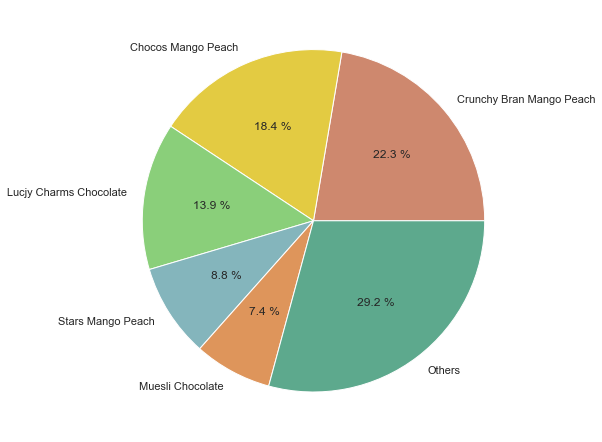

In [90]:
# Making the pie chart

x1 = groupby_skudesc_in_head.Units[0]
x2 = groupby_skudesc_in_head.Units[1]
x3 = groupby_skudesc_in_head.Units[2]
x4 = groupby_skudesc_in_head.Units[3]
x5 = groupby_skudesc_in_head.Units[4]
Rest = Total_sum_in - x1 - x2 - x3 - x4 - x5

label_name = groupby_skudesc_in_head.index

labels = [label_name[0], label_name[1], label_name[2], label_name[3], label_name[4], "Others"]

piechart_figure_6labels(x1 = x1, x2 = x2, x3 = x3, x4 = x4, x5 = x5, x6 = Rest, labels = labels, rooth_path = rooth_path, name_fig="\\sellin_sku_units.png")

From supplier to final user (sellout)

In [91]:
# Group by type of product (Sku_Description)
groupby_skudesc_out_head = df_sellout_final.groupby("Sku_Description").sum("Units").sort_values("Units", ascending=False).head()
groupby_skudesc_out_head

Sku       Units         Price    Store_Id
Sku_Description                                                              
Crunchy Bran Mango Peach  1890129664306  29540217.0  5.307024e+06  1110643675
Chocos Mango Peach        1844698223475  22033857.0  7.313245e+06  1099968676
Lucjy Charms Chocolate    1596743566893  16293768.0  6.068971e+06   978365853
Stars Mango Peach         1685083005573  10394099.0  6.421862e+06   963561595
Muesli Chocolate          1379968685970   9279863.0  5.227491e+06   834980485

In [92]:
# Doing the total units of all type of products
Total_sum_out = df_sellout_final.Units.sum()
Total_sum_out

116091620.76999995

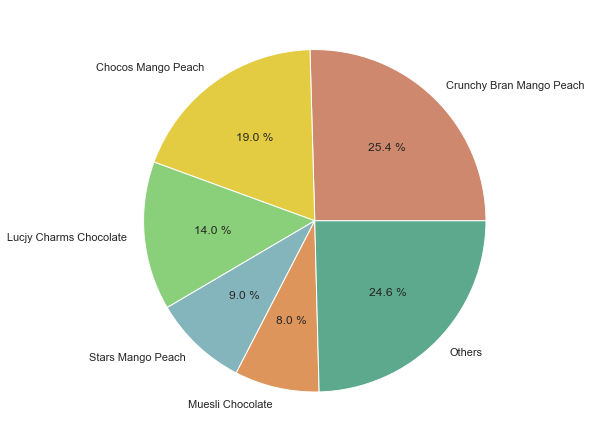

In [93]:
# Making the pie chart

x1 = groupby_skudesc_out_head.Units[0]
x2 = groupby_skudesc_out_head.Units[1]
x3 = groupby_skudesc_out_head.Units[2]
x4 = groupby_skudesc_out_head.Units[3]
x5 = groupby_skudesc_out_head.Units[4]
Rest = Total_sum_out - x1 - x2 - x3 - x4 - x5

label_name = groupby_skudesc_out_head.index

labels = [label_name[0], label_name[1], label_name[2], label_name[3], label_name[4], "Others"]

piechart_figure_6labels(x1 = x1, x2 = x2, x3 = x3, x4 = x4, x5 = x5, x6 = Rest, labels = labels, rooth_path = rooth_path, name_fig="\\sellout_sku_units.png")

## Where are more products sold?

From manufacturer to supplier (sellin)

In [94]:
# Making group by state
groupby_state_in = df_sellin_final.groupby("State").sum("Units").sort_values("Units", ascending=False).head()
groupby_state_in

Sku         Units         Price        Margin  \
State                                                                  
Magornmar    1973759209602  4.565979e+07  9.598095e+06  6.928638e+06   
Alloralf     2412775932836  4.100110e+07  1.179025e+07  8.517924e+06   
Coalmar       212894785946  1.073659e+07  9.533726e+05  6.710992e+05   
Thrilvallor   319946309797  9.595306e+06  1.557989e+06  1.122465e+06   
Lorvalmo      317491944331  5.884945e+06  1.507395e+06  1.088734e+06   

               Store_Id  
State                    
Magornmar    1294553262  
Alloralf     1464553008  
Coalmar       107749039  
Thrilvallor   186706861  
Lorvalmo      216182129

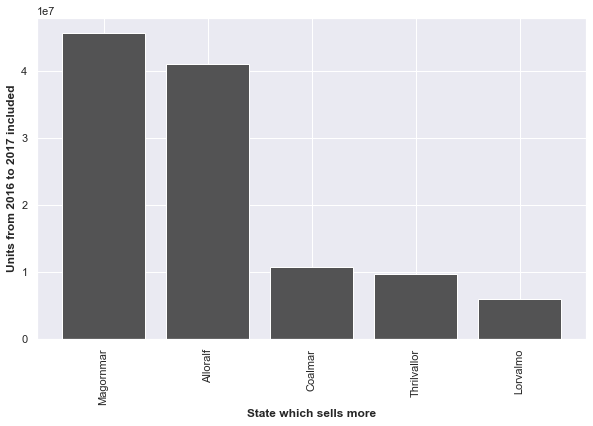

In [95]:
# Making the histogram
x = groupby_state_in.index
y = groupby_state_in.Units

histogram_figure(x = x, y = y, x_label = "State which sells more", y_label = "Units from 2016 to 2017 included", rooth_path = rooth_path, name_fig="\\sellin_state_units.png")

From supplier to final user (sellout)

In [96]:
# Making group by State
groupby_state_out = df_sellout_final.groupby("State").sum("Units").sort_values("Units", ascending=False).head()
groupby_state_out

Sku         Units         Price    Store_Id
State                                                             
Magornmar    4209177916411  2.876002e+07  1.706816e+07  2580483506
Alloralf     5639320077513  2.684726e+07  2.226293e+07  3283126469
Coalmar      1415816283428  9.813931e+06  5.723502e+06   628380956
Thrilvallor  1359240603107  7.110643e+06  5.250879e+06   730568701
Arrodio       456203932115  4.581163e+06  1.893482e+06   175801043

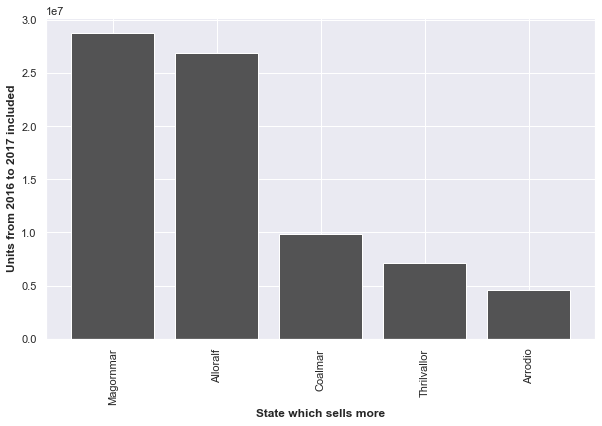

In [97]:
# Making the histogram
x = groupby_state_out.index
y = groupby_state_out.Units

histogram_figure(x = x, y = y, x_label = "State which sells more", y_label = "Units from 2016 to 2017 included", rooth_path = rooth_path, name_fig="\\sellout_state_units.png")

## On what dates is it sold more?

From manufacturer to supplier (sellin)

In [98]:
# Making group by Month
groupby_date_in = df_sellin_final.groupby(pd.Grouper(key='Date', freq='M')).sum("Units").sort_values("Date", ascending=False)
groupby_date_in

Sku         Units         Price        Margin   Store_Id
Date                                                                         
2017-12-31    9168396779  4.159354e+05  5.079074e+04  3.734948e+04     526270
2017-11-30   15763219020  7.391822e+05  8.415861e+04  6.174952e+04     778595
2017-10-31   14588625327  7.013559e+05  7.589648e+04  5.536795e+04     840030
2017-09-30   12690328078  6.920469e+05  6.451575e+04  4.699136e+04     624521
2017-08-31   12514016439  6.539557e+05  6.556072e+04  4.805520e+04     666102
2017-07-31   14328346453  7.435844e+05  7.078465e+04  5.129925e+04     757237
2017-06-30   14121651266  6.160464e+05  7.520529e+04  5.522697e+04     785336
2017-05-31   60706792432  2.786083e+06  3.323382e+05  2.449176e+05    3242997
2017-04-30   60854617213  2.873729e+06  3.349229e+05  2.472771e+05    3143986
2017-03-31   56801328050  2.687905e+06  2.931848e+05  2.149726e+05    3108537
2017-02-28   52076893858  2.473789e+06  2.693417e+05  1.976546e+05    2752742
2017-01-31   61061599923  2.483090e+06  3.101233e+05  2.242064e+05    3283342
2016-12-31  616140292802  1.257147e+07  3.025843e+06  2.202930e+06  400246629
2016-11-30  558344250373  1.170258e+07  2.759645e+06  2.005324e+06  362529417
2016-10-31  587518273281  1.205778e+07  2.862958e+06  2.063200e+06  382490655
2016-09-30  605093745350  1.300326e+07  2.894926e+06  2.081895e+06  393027955
2016-08-31  608867363957  1.331020e+07  2.951609e+06  2.123993e+06  397170324
2016-07-31  580729602590  1.249658e+07  2.806169e+06  2.009365e+06  377250075
2016-06-30  571320359697  1.230265e+07  2.792318e+06  2.004047e+06  372508008
2016-05-31  619991911693  1.314276e+07  3.020501e+06  2.168794e+06  403915095
2016-04-30  608744221731  1.237674e+07  2.956126e+06  2.120196e+06  395643821
2016-03-31  553380799540  1.103531e+07  2.716348e+06  1.953547e+06  359812276
2016-02-29  542160080529  1.117074e+07  2.586423e+06  1.854979e+06  353159130
2016-01-31  547389421707  1.060760e+07  2.653974e+06  1.905024e+06  356858213

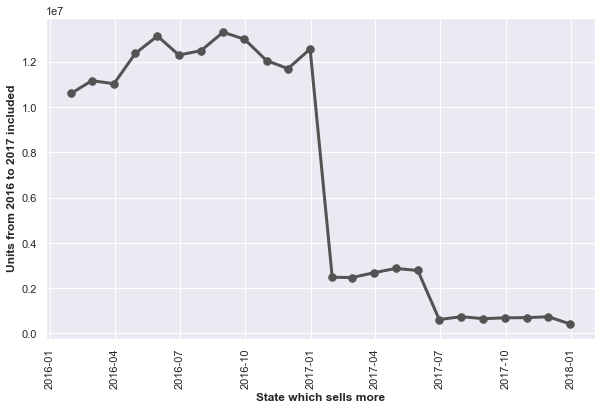

In [99]:
# Making line diagram
x = groupby_date_in.index
y = groupby_date_in.Units

linediagram_figure(x = x, y = y, x_label = "State which sells more", y_label = "Units from 2016 to 2017 included", rooth_path = rooth_path, name_fig="\\sellin_date_units.png")

From supplier to final user (sellout)

In [100]:
# Making group by Month
groupby_date_out = df_sellout_final.groupby(pd.Grouper(key='Date', freq='M')).sum("Units").sort_values("Date", ascending=True)
groupby_date_out

Sku         Units         Price    Store_Id
Date                                                             
2016-01-31  2586627104720  1.153033e+07  9.270365e+06  1675614957
2016-02-29  2528140100774  1.175701e+07  9.161127e+06  1635886854
2016-03-31  2707407321623  1.188439e+07  9.848261e+06  1751512781
2016-04-30  2548253029135  1.142255e+07  9.205185e+06  1648321856
2016-05-31              0  0.000000e+00  0.000000e+00           0
2016-06-30              0  0.000000e+00  0.000000e+00           0
2016-07-31  2696057269920  1.226700e+07  9.865532e+06  1742448065
2016-08-31  2635214976726  1.223977e+07  9.618069e+06  1698137710
2016-09-30              0  0.000000e+00  0.000000e+00           0
2016-10-31   296779199880  1.838804e+06  1.086698e+06   191070075
2016-11-30  2802799439513  1.230504e+07  1.055507e+07  1804642150
2016-12-31  2793971104014  1.252113e+07  1.051159e+07  1798159164
2017-01-31   557587095272  3.630894e+06  3.089747e+06    29929443
2017-02-28   523060711750  3.224013e+06  2.961250e+06    27985376
2017-03-31   556307474190  3.353517e+06  3.372857e+06    29836223
2017-04-30   551564945145  3.643920e+06  3.430269e+06    29602526
2017-05-31   573532181030  3.819331e+06  3.564580e+06    30881680
2017-06-30    75683054443  6.539192e+05  4.746754e+05     4066927

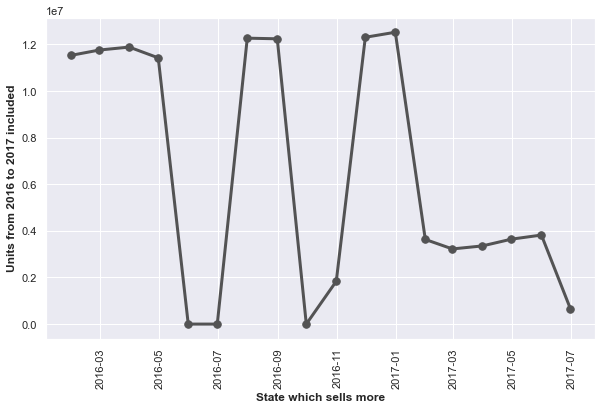

In [101]:
# Making diagram line
x = groupby_date_out.index
y = groupby_date_out.Units

linediagram_figure(x = x, y = y, x_label = "State which sells more", y_label = "Units from 2016 to 2017 included", rooth_path = rooth_path, name_fig="\\sellout_date_units.png")

 ## Which supplier do you sell the most to?

In [102]:
# Group by supplier
groupby_supplier_in = df_sellin_final.groupby("Supplier").sum("Units")
groupby_supplier_in

Sku         Units         Price        Margin  \
Supplier                                                               
proveedor_1   384675814838  1.786670e+07  2.026823e+06  1.485068e+06   
proveedor_2  6999680323250  1.457777e+08  3.402684e+07  2.449329e+07   

               Store_Id  
Supplier                 
proveedor_1    20509695  
proveedor_2  4554611598

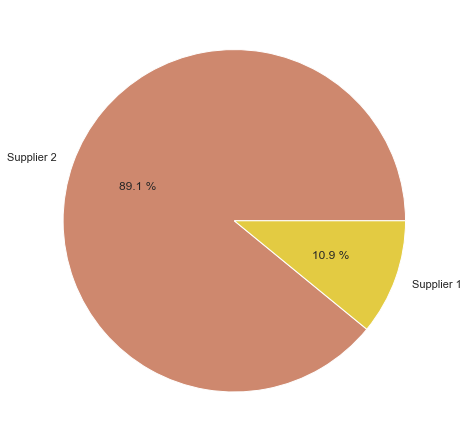

In [103]:
# Making the pie chart
Supplier_1 = groupby_supplier_in["Units"].values[0]
Supplier_2 = groupby_supplier_in["Units"].values[1]

labels = ["Supplier 2", "Supplier 1"]

piechart_figure_6labels(x1 = Supplier_2, x2 = Supplier_1, labels = labels, rooth_path = rooth_path, name_fig="\\sellin_supplier_units.png")

## Document to Data Scientists

In [100]:
# Here I saved the final DataFrames cleaned to send to Data Scientists 
    # Then they will have to charge in a notebook as a variable to make the query
df_sellin_final.to_csv("..\data\sellin_final.csv")
df_sellout_final.to_csv("..\data\sellout_final.csv")

In [101]:
# To make the query they will have to fill in the variables as indicated in the example

start_date = "2016-01-14"
end_date = "2016-01-31"
df = df_sellin_final # Fill it with df_sellin_final or df_sellout_final
Products = ["Crunchy Bran Mango Peach", "Chocos Mango Peach", "Lucjy Charms Chocolate", "Stars Mango Peach", "Muesli Chocolate"]
Store_id = [1668, 240, 606, 612]

df[(df['Date'] > start_date) & (df['Date'] < end_date) & (df['Sku_Description'].isin(Products)) & (df['Store_Id'].isin(Store_id))]

Date      Sku           Sku_Description Sku_Category  \
56676  2016-01-15  4381425        Chocos Mango Peach   Sugar-free   
57466  2016-01-15  4240039    Lucjy Charms Chocolate   Sugar-free   
57499  2016-01-15  4554143         Stars Mango Peach   Sugar-free   
57532  2016-01-15  4381425        Chocos Mango Peach   Sugar-free   
57597  2016-01-15  4250046          Muesli Chocolate   Sugar-free   
59575  2016-01-15  4240039    Lucjy Charms Chocolate   Sugar-free   
63765  2016-01-18  4240039    Lucjy Charms Chocolate   Sugar-free   
64022  2016-01-18  4381425        Chocos Mango Peach   Sugar-free   
64231  2016-01-18  4250046          Muesli Chocolate   Sugar-free   
66893  2016-01-18  4240039    Lucjy Charms Chocolate   Sugar-free   
67052  2016-01-18  4554143         Stars Mango Peach   Sugar-free   
68867  2016-01-18  4381425        Chocos Mango Peach   Sugar-free   
69426  2016-01-18  4442378  Crunchy Bran Mango Peach   Sugar-free   
76854  2016-01-20  4554143         Stars Mango Peach   Sugar-free   
77292  2016-01-20  4381425        Chocos Mango Peach   Sugar-free   
77411  2016-01-20  4250046          Muesli Chocolate   Sugar-free   
77637  2016-01-20  4442378  Crunchy Bran Mango Peach   Sugar-free   
77837  2016-01-20  4240039    Lucjy Charms Chocolate   Sugar-free   
78902  2016-01-20  4240039    Lucjy Charms Chocolate   Sugar-free   
83729  2016-01-22  4442378  Crunchy Bran Mango Peach   Sugar-free   
84348  2016-01-22  4554143         Stars Mango Peach   Sugar-free   
84805  2016-01-22  4250046          Muesli Chocolate   Sugar-free   
86827  2016-01-22  4240039    Lucjy Charms Chocolate   Sugar-free   
86883  2016-01-22  4554143         Stars Mango Peach   Sugar-free   
86956  2016-01-22  4381425        Chocos Mango Peach   Sugar-free   
93216  2016-01-25  4442378  Crunchy Bran Mango Peach   Sugar-free   
93739  2016-01-25  4381425        Chocos Mango Peach   Sugar-free   
93769  2016-01-25  4250046          Muesli Chocolate   Sugar-free   
93855  2016-01-25  4554143         Stars Mango Peach   Sugar-free   
97050  2016-01-25  4442378  Crunchy Bran Mango Peach   Sugar-free   
102649 2016-01-27  4381425        Chocos Mango Peach   Sugar-free   
103716 2016-01-27  4240039    Lucjy Charms Chocolate   Sugar-free   
103779 2016-01-27  4240039    Lucjy Charms Chocolate   Sugar-free   
104404 2016-01-27  4554143         Stars Mango Peach   Sugar-free   
105039 2016-01-27  4381425        Chocos Mango Peach   Sugar-free   
112554 2016-01-29  4554143         Stars Mango Peach   Sugar-free   
112678 2016-01-29  4240039    Lucjy Charms Chocolate   Sugar-free   
113341 2016-01-29  4442378  Crunchy Bran Mango Peach   Sugar-free   
113664 2016-01-29  4381425        Chocos Mango Peach   Sugar-free   
113739 2016-01-29  4250046          Muesli Chocolate   Sugar-free   
114376 2016-01-29  4381425        Chocos Mango Peach   Sugar-free   
116361 2016-01-29  4240039    Lucjy Charms Chocolate   Sugar-free   
116601 2016-01-29  4250046          Muesli Chocolate   Sugar-free   

       Sku_Subcategory   Units  Price  Margin  Store_Id     Supplier  \
56676      Cereal bars   600.0  15.18   10.84       240  proveedor_2   
57466      Cereal bars    84.0  13.74    9.46      1668  proveedor_2   
57499      Cereal bars    24.0  13.84    9.49      1668  proveedor_2   
57532      Cereal bars    36.0  13.84    9.49      1668  proveedor_2   
57597      Cereal bars    12.0  13.74    9.46      1668  proveedor_2   
59575      Cereal bars   600.0  14.51   10.22       240  proveedor_2   
63765      Cereal bars   600.0  14.51   10.22       240  proveedor_2   
64022      Cereal bars   600.0  15.18   10.84       240  proveedor_2   
64231      Cereal bars   444.0  14.51   10.22       240  proveedor_2   
66893      Cereal bars    84.0  13.74    9.46      1668  proveedor_2   
67052      Cereal bars    12.0  13.84    9.49      1668  proveedor_2   
68867      Cereal bars    60.0  13.84    9.49      1668  proveedor_2   
69426      Cereal bars    24.0  11.09   